Practica 2. Aprendizaje Supervisado.
Seminario de Estadística II – Ciencia de datos.
Rojas Lagunas Kevin Antonio

1. Data Preprocessing

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Cargamos los datos
data = pd.read_csv('dataset_house_prices_practica.csv')
print('Dimension del dataframe:',data.shape,'\n')
data = data.drop(columns='Unnamed: 0') #Eliminamos columna indice, pandas por si solo ya añade un indice al crear un dataframe
print('',data.info())

Dimension del dataframe: (6210, 82) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6210 entries, 0 to 6209
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             6210 non-null   float64
 1   MSSubClass     6210 non-null   float64
 2   MSZoning       6206 non-null   object 
 3   LotFrontage    5705 non-null   object 
 4   LotArea        6210 non-null   object 
 5   Street         6210 non-null   object 
 6   Alley          3456 non-null   object 
 7   LotShape       6210 non-null   object 
 8   LandContour    6210 non-null   object 
 9   Utilities      6208 non-null   object 
 10  LotConfig      6210 non-null   object 
 11  LandSlope      6210 non-null   object 
 12  Neighborhood   6210 non-null   object 
 13  Condition1     6210 non-null   object 
 14  Condition2     6210 non-null   object 
 15  BldgType       6210 non-null   object 
 16  HouseStyle     6210 non-null   object 
 17  OverallQual   

Analizamos los datos

In [185]:
#Cambiamos los datos a categorias mas convenientes
data['Id'] = data['Id'].astype('int64')
data['MSSubClass'] = data['MSSubClass'].astype('int64')
#Los datos que tienen fechas los dejamos con tipo int porque como no estamos haciendo series de tiempo no ocupamos la fecha, (le pregunte al profe)

Voy agregar etiquetas para que sea mas facil identificar los tipos de datos directamente en sus nombres

In [186]:
#Categorizamos los campos en tipo de datos
d_feats = []
c_feats = []
s_feats = []

#Lo hacemos con un for ya que son 81 columnas
for col in data.columns:
    if data[col].dtype == 'float64':
        c_feats.append(col)
    if data[col].dtype == 'object':
        s_feats.append(col)
    if data[col].dtype == 'int64':
        d_feats.append(col)

#Agregamos las etiquetas
d_feats_new = ["d_" + x for x in d_feats]
c_feats_new = ["c_" + x for x in c_feats]
s_feats_new = ["s_" + x for x in s_feats]

#Renombramos en el dataframe
data.rename(columns = dict(zip(c_feats, c_feats_new)), inplace = True)
data.rename(columns = dict(zip(d_feats, d_feats_new)), inplace = True)
data.rename(columns = dict(zip(s_feats, s_feats_new)), inplace = True)

print(data.info())
print(len(d_feats) + len(c_feats) + len(s_feats))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6210 entries, 0 to 6209
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   d_Id             6210 non-null   int64  
 1   d_MSSubClass     6210 non-null   int64  
 2   s_MSZoning       6206 non-null   object 
 3   s_LotFrontage    5705 non-null   object 
 4   s_LotArea        6210 non-null   object 
 5   s_Street         6210 non-null   object 
 6   s_Alley          3456 non-null   object 
 7   s_LotShape       6210 non-null   object 
 8   s_LandContour    6210 non-null   object 
 9   s_Utilities      6208 non-null   object 
 10  s_LotConfig      6210 non-null   object 
 11  s_LandSlope      6210 non-null   object 
 12  s_Neighborhood   6210 non-null   object 
 13  s_Condition1     6210 non-null   object 
 14  s_Condition2     6210 non-null   object 
 15  s_BldgType       6210 non-null   object 
 16  s_HouseStyle     6210 non-null   object 
 17  d_OverallQual 

In [187]:
#Dropeamos los duplicados
print('Tenemos:', data.duplicated().sum(),'duplicados')
data = data.drop_duplicates()
print('Dimension despues de soltar los duplicados:',data.shape)

Tenemos: 18 duplicados
Dimension despues de soltar los duplicados: (6192, 81)


Hacemos una exploracion de la completitud como la que vimos en clase

In [188]:
#Vemos la completitud de los datos
completitudDat = pd.DataFrame(data.isnull().sum())
completitudDat.reset_index(inplace=True)
completitudDat.rename(columns={'index':'columna', 0:'nulos_total'}, inplace=True)
completitudDat['completitud'] = ((1 - completitudDat['nulos_total'] / data.shape[0]) * 100).round(2)
completitudDat = completitudDat.sort_values(by='completitud', ascending=True)
print(completitudDat.to_string()) #Agregamos el metodo to_string para poder ver todas las columnas. 
#Por alguna razon al ser tantos campos, no me deja ver todos si lo dejo como un DF noraml

            columna  nulos_total  completitud
25     s_MasVnrType         4940        20.22
72         s_PoolQC         3182        48.61
74    s_MiscFeature         3082        50.23
6           s_Alley         2738        55.78
73          s_Fence         2570        58.49
57    s_FireplaceQu         1550        74.97
3     s_LotFrontage          502        91.89
59    c_GarageYrBlt          173        97.21
64     s_GarageCond          173        97.21
60   s_GarageFinish          173        97.21
63     s_GarageQual          173        97.21
58     s_GarageType          171        97.24
30       s_BsmtQual           88        98.58
31       s_BsmtCond           88        98.58
32   s_BsmtExposure           87        98.59
35   s_BsmtFinType2           85        98.63
33   s_BsmtFinType1           84        98.64
26     s_MasVnrArea           23        99.63
2        s_MSZoning            4        99.94
9       s_Utilities            2        99.97
55     s_Functional            2  

Asignacion de tipos de datos correctos.

Nota: La mayoria de esto se hizo durante todos el resto del analisis y se trajeron aqui una vez me percate de la necesidad de ello. Algunos otros se quedan en la imputacion
de missins

In [189]:
#s_TotalBsmtSF deberia ser int, pero tiene texto de ruido. Hay que eliminarlo y reemplazarlo por el promedio
data['s_TotalBsmtSF'] = pd.to_numeric(data['s_TotalBsmtSF'], errors='coerce')
data['s_TotalBsmtSF'] = data['s_TotalBsmtSF'].fillna(data['s_TotalBsmtSF'].mean())
data = data.rename(columns={'s_TotalBsmtSF': 'c_TotalBsmtSF'})

#s_1stFlrSF deberia ser int, pero tiene texto de ruido. Hay que eliminarlo y reemplazarlo por el promedio
data['s_1stFlrSF'] = pd.to_numeric(data['s_1stFlrSF'], errors='coerce')
data['s_1stFlrSF'] = data['s_1stFlrSF'].fillna(data['s_1stFlrSF'].mean())
data = data.rename(columns={'s_1stFlrSF': 'c_1stFlrSF'})

#s_2ndFlrSF deberia ser int, pero tiene texto de ruido. Hay que eliminarlo y reemplazarlo por el promedio
data['s_2ndFlrSF'] = pd.to_numeric(data['s_2ndFlrSF'], errors='coerce')
data['s_2ndFlrSF'] = data['s_2ndFlrSF'].fillna(data['s_2ndFlrSF'].mean())
data = data.rename(columns={'s_2ndFlrSF': 'c_2ndFlrSF'})
print(data['c_2ndFlrSF'].dtype)

#s_GrLivArea deberia ser int, pero tiene texto de ruido. Hay que eliminarlo y reemplazarlo por el promedio
data['s_GrLivArea'] = pd.to_numeric(data['s_GrLivArea'], errors='coerce')
data['s_GrLivArea'] = data['s_GrLivArea'].fillna(data['s_GrLivArea'].mean())
data = data.rename(columns={'s_GrLivArea': 'c_GrLivArea'})

#s_LotArea deberia ser int, pero tiene texto de ruido. Hay que eliminarlo y reemplazarlo por el promedio
data['s_LotArea'] = pd.to_numeric(data['s_LotArea'], errors='coerce')
data['s_LotArea'] = data['s_LotArea'].fillna(data['s_LotArea'].mean())
data = data.rename(columns={'s_LotArea': 'c_LotArea'})

#s_GarageArea deberia ser int, pero tiene texto de ruido. Hay que eliminarlo y reemplazarlo por el promedio
data['s_GarageArea'] = pd.to_numeric(data['s_GarageArea'], errors='coerce')
data['s_GarageArea'] = data['s_GarageArea'].fillna(data['s_GarageArea'].mean())
data = data.rename(columns={'s_GarageArea': 'c_GarageArea'})

#Tenemos algunas numeros basura en s_MSZoning, hay que ponerlos como nan
numericos = pd.to_numeric(data['s_MSZoning'], errors='coerce').notna()
data.loc[numericos, 's_MSZoning'] = np.nan

#s_Street tiene unos pocos numeros que corresponden a registros None
numericos = pd.to_numeric(data['s_Street'], errors='coerce').notna()
data.loc[numericos, 's_Street'] = np.nan
data['s_Street'] = data['s_Street'].fillna('None')

#Para s_LotShape tenemos unos pocos registros que son numericos y corresponden a vacios, como carecemos de mas informacion para llenarlos con alguna categoria, 
#voy a dropear esos pocos registros
mask_num = pd.to_numeric(data['s_LotShape'], errors='coerce').notna()
data = data[~mask_num]

#Para s_BldgType tenemos unos pocos registros que son numericos y corresponden a vacios, como carecemos de mas informacion para llenarlos con alguna categoria, 
#voy a dropear esos pocos registros
mask_num = pd.to_numeric(data['s_BldgType'], errors='coerce').notna()
data = data[~mask_num]

#Para s_HouseStyle tenemos unos pocos registros que son numericos y corresponden a vacios, como carecemos de mas informacion para llenarlos con alguna categoria, 
#voy a dropear esos pocos registros
mask_num = pd.to_numeric(data['s_HouseStyle'], errors='coerce').notna()
data = data[~mask_num]

#Para s_RoofStyle tenemos unos pocos registros que son numericos y corresponden a vacios, como carecemos de mas informacion para llenarlos con alguna categoria, 
#voy a dropear esos pocos registros
mask_num = pd.to_numeric(data['s_RoofStyle'], errors='coerce').notna()
data = data[~mask_num]

#Para s_Exterior1st tenemos unos pocos registros que son numericos y corresponden a vacios, como carecemos de mas informacion para llenarlos con alguna categoria, 
#voy a dropear esos pocos registros
mask_num = pd.to_numeric(data['s_Exterior1st'], errors='coerce').notna()
data = data[~mask_num]

float64


Imputar valores missings

Realice comentarios del porque en cada variable para evitar poner tantos markdowns

Si tienen mas del 20% de missins es razonable simplemente dropearlas, pero realice un analisis de cada una para ver sus particularidades.

In [190]:
'''Para s_MasVnrType, que es la variable con mas missins. Investigando encontre que la variables se refiere a tipo de recubrimiento exterior de mampostería
Como las casas no necesariamente tienen mamposteria, los nan se refieren a este caso, por lo tanto en lugar de asignarles valores resultado de alguna medida estadistica se
va a optar por hacerla una categoria en si misma: NoMasonry'''

print(data['s_MasVnrType'].value_counts(dropna=False))
print(data['s_MasVnrArea'].value_counts(dropna=False))

'''Pero vemos que la variable de area de recubrimiento s_MasVnrArea solo tiene 1769 registros iguales a 0, por lo que en s_MasVnrType hay mas de 3mil registros mal tipeados,
lo que nos habla de una mala integridad de la variable s_MasVnrType y nos permite eliminarla'''

data = data.drop(columns='s_MasVnrType')

#Nos encontramos valores basura en s_MasVnrArea, entonces vamos a mandar a NaN cualquier cosa no numérica (incluye "xksax0.0"). 
data['s_MasVnrArea'] = pd.to_numeric(data['s_MasVnrArea'], errors='coerce')
#Le asignamos el promedio a los nan
data.loc[data['s_MasVnrArea'].isna(), 's_MasVnrArea'] = data['s_MasVnrArea'].mean()
#Le cambiamos el nombre porque ya es numerica
print(data['s_MasVnrArea'].dtype)
data = data.rename(columns={'s_MasVnrArea':'c_MasVnrArea'})

s_MasVnrType
NaN        4267
BrkFace     628
Stone       188
BrkCmn       19
Name: count, dtype: int64
s_MasVnrArea
0.0                    1154
xksax0.0                 97
NaN                      14
120.0                    13
178.0                    10
                       ... 
167.0                     1
1115.0                    1
-100.04546196719113       1
-119.46568016265928       1
22.006782287219735        1
Name: count, Length: 3430, dtype: int64
float64


In [191]:
'''s_PoolQC tiene muchos missins y por el tipo de variable vemos que puede referirse a la calidad de la alberca de la casa. Aqui el problema es identificar si los NaN se 
deben a que las casas no tienen alberca o a si se intentó ingresar alguna otra cosa no valida. Para esto podemos ayudarnos de la variable c_PoolArea la cual no tiene missins.
todos los NaN en s_PoolQC que tambien tengan un 0 en c_PoolArea serán porque la propiedad no cuenta directamente con alberca.'''

print(data['c_PoolArea'].value_counts(dropna=False)) #Vemos que solo 13 cases tienen alberca, entonces podemos afirmar que todos las missins pertenecen a casas sin alberca
#Entonces podemos agregar a la variable s_PollQC la categoria 'NoPool'
data['s_PoolQC'] = data['s_PoolQC'].fillna('NoPool')
print(data['s_PoolQC'].value_counts(dropna=False))

'''Sin embargo, hay una incongruencia ya que c_PoolArea solo reporta 13 casas con area de alberca diferente de 0, mientras que s_PoolQC tiene mas de 3mil valores con Excelent.
Esto nos dice que la variable s_PoolQC no tiene buena integridad, por lo cual es viable borrarla del dataset.'''
data = data.drop(columns='s_PoolQC')

c_PoolArea
0.0      5093
512.0       1
648.0       1
480.0       1
519.0       1
738.0       1
144.0       1
368.0       1
444.0       1
800.0       1
Name: count, dtype: int64
s_PoolQC
Ex        3002
NoPool    2095
Gd           3
Fa           2
Name: count, dtype: int64


In [192]:
'''La siguiente variable con mas missins es s_MiscFeature. Se refiere a tipos de adiciones fuera de la casa como shed=cobertizo, gar2=segundo garaje, tenc=cancha de tenis.
En este caso, como ya existe la categoria Othr, muy probablemente los NaN correspondan a auscencia de una adicion, con lo cual se les puede asignar a los nan la categoria 
None. Sin embargo esto solo aplica para los casos en los que la variable c_MiscVal (valor de la adicion) tambien es 0.'''
print(data['s_MiscFeature'].value_counts(dropna=False))
print(data['c_MiscVal'].value_counts(dropna=False))

'''Sucede lo mismo que con la variable anterior. La mayoria de las casas tiene c_MiscVal igual a 0, mientras que s_MiscFeature reporta mas de 3mil registros con alguna
adicion, lo cual no tiene sentido. Esto aunado al gran numero de missins, nos permite justificar la eliminacion de la variable s_MiscFeature.'''
data = data.drop(columns='s_MiscFeature')

s_MiscFeature
Shed    3061
NaN     2034
Gar2       3
Othr       3
TenC       1
Name: count, dtype: int64
c_MiscVal
0.0        5035
400.0        12
500.0        10
450.0         7
2000.0        6
600.0         4
1200.0        3
700.0         3
650.0         3
15500.0       1
800.0         1
480.0         1
54.0          1
3500.0        1
1150.0        1
8300.0        1
80.0          1
900.0         1
1500.0        1
2500.0        1
750.0         1
6500.0        1
1000.0        1
4500.0        1
3000.0        1
17000.0       1
1512.0        1
455.0         1
Name: count, dtype: int64


In [193]:
'''La siguiente con mas missins es s_Alley, la cual es una variable que nos suele indicar que tipo de material recubre el callejon que da acceso a la propiedad
tal como Grvl=grava. Los numeros que aparecen no corresponden con el tipo de variable y como son pocos pueden tomarse como contaminacion y eliminarse para remplazarlos por 
un nan. Los nan en este caso representan que la casa no cuenta con callejon de acceso, con lo cual los podemos rellenar cono None.'''

#Cambiamos todos lon numeros ruido por nans
print(data['s_Alley'].value_counts(dropna=False))
data.loc[(data['s_Alley']!='Grvl') & (data['s_Alley']!='Pave'), 's_Alley'] = np.nan
print(data['s_Alley'].value_counts(dropna=False))

#Rellenamos los nans por la categoria None
data['s_Alley'] = data['s_Alley'].fillna('None')
print(data['s_Alley'].value_counts(dropna=False))


s_Alley
Grvl    3084
NaN     1792
Pave      49
8396       1
3363       1
        ... 
1602       1
5992       1
4102       1
3311       1
6104       1
Name: count, Length: 180, dtype: int64
s_Alley
Grvl    3084
NaN     1969
Pave      49
Name: count, dtype: int64
s_Alley
Grvl    3084
None    1969
Pave      49
Name: count, dtype: int64


In [194]:
'''La siguiente variable con mas missins es s_Fence, la cual reporta que tipo de cerca tiene la propiedad y como ninguna otra variable se relaciona directamente se asume
que los nans corresponden a casas sin cerca, por lo cual se va a proceder a asignar la categoria None'''

print(data['s_Fence'].value_counts(dropna=False))
data['s_Fence'] = data['s_Fence'].fillna('None')
print(data['s_Fence'].value_counts(dropna=False))

s_Fence
MnPrv    3224
NaN      1691
GdWo       90
GdPrv      87
MnWw       10
Name: count, dtype: int64
s_Fence
MnPrv    3224
None     1691
GdWo       90
GdPrv      87
MnWw       10
Name: count, dtype: int64


In [195]:
'''La ultima variable con mas del 10% de missins es s_FireplaceQu, la cual se refiere a la calidad de la chimenea. Tambien tenemos la variable c_Fireplaces, que son el 
numero de chimeneas.'''

print(data['s_FireplaceQu'].value_counts(dropna=False))
print(data['c_Fireplaces'].value_counts(dropna=False))

'''Vemos que el numero de NaN en s_FireplaceQu se corresponde perfectamente con los 0 de c_Fireplaces. Por lo cual podemos remplazar los na con la categoria None'''
data.loc[data['c_Fireplaces']==0.0,'s_FireplaceQu'] = 'None' #Usamos la variable c_Fireplaces para asignar los none para asegurarnos de que los 0.0 esten pareados con los nan
print(data['s_FireplaceQu'].value_counts(dropna=False)) #Comprobamos que ahora todos los nan sean None


s_FireplaceQu
Gd     3536
NaN    1012
TA      437
Fa       58
Po       32
Ex       27
Name: count, dtype: int64
c_Fireplaces
1.0    3910
0.0    1012
2.0     170
3.0       9
4.0       1
Name: count, dtype: int64
s_FireplaceQu
Gd      3536
None    1012
TA       437
Fa        58
Po        32
Ex        27
Name: count, dtype: int64


In [196]:
'''La variable s_LotFrontage tiene 502 registros nulos. Se refiere a la longitud de la fachada hacia la calle, cosa que todas la propiedades existentes tiene, por lo tanto
el 0 no es un valido. Primero se eliminara el texto ruido, ya que debe ser una variable numerica y despues se asignaran a los nan la mediana de acuerdo al barrio'''

#Eliminamos ruido
data['s_LotFrontage'] = pd.to_numeric(data['s_LotFrontage'], errors='coerce')

#Asignamos mediana por de acuerdo al barrio (s_Neighborhood no tiene messins ni ruido)
print(data['s_Neighborhood'].value_counts(dropna=False))
medBarrio = data.groupby('s_Neighborhood')['s_LotFrontage'].transform('median') #mediana para cada barrio de lotfrontage
data['s_LotFrontage'] = data['s_LotFrontage'].fillna(medBarrio) #se la asignamos a los na
print(data['s_LotFrontage'].value_counts(dropna=False).to_string())
#Le cambiamos la etiqueta
data = data.rename(columns={'s_LotFrontage':'c_LotFrontage'})

s_Neighborhood
NAmes      3320
CollgCr     198
OldTown     171
Edwards     138
Gilbert     131
Somerst     130
NridgHt     115
Sawyer      112
NWAmes      102
Mitchel      83
Crawfor      82
SawyerW      77
BrkSide      70
IDOTRR       64
NoRidge      56
Timber       50
ClearCr      33
StoneBr      30
SWISU        30
MeadowV      28
Blmngtn      21
BrDale       21
Veenker      16
NPkVill      15
Blueste       9
Name: count, dtype: int64
s_LotFrontage
 60.000000     206
 70.000000     179
 80.000000     133
 75.000000     121
 63.000000      89
 69.844849      80
 65.000000      76
 50.000000      72
 85.000000      67
 74.000000      53
 21.000000      40
 24.000000      36
 78.000000      35
 90.000000      33
 68.000000      29
 51.000000      28
 72.000000      26
 64.000000      26
 89.000000      24
 43.000000      23
 100.000000     21
 62.000000      21
 79.000000      20
 73.000000      20
 91.000000      20
 81.500000      19
 88.000000      18
 66.000000      17
 59.000000   

In [197]:
'''Ahora para los garages, vemos que s_GarageCond, s_GarageQual,c_GarageYrBlt, y s_GarageFinish tienen los mismos NaN, por lo cual es facil asumir que esos registros
tienen la categoria None'''
print(data['s_GarageCond'].value_counts(dropna=False))
print(data['s_GarageQual'].value_counts(dropna=False))
print(data['c_GarageYrBlt'].value_counts(dropna=False))
print(data['s_GarageFinish'].value_counts(dropna=False))

data['s_GarageCond'] = data['s_GarageCond'].fillna('None')
data['s_GarageQual'] = data['s_GarageQual'].fillna('None')
data['s_GarageFinish'] = data['s_GarageFinish'].fillna('None')
#Aqui rellenamos con la mediana ya que es una variable numerica
garage_mediana = data['c_GarageYrBlt'].median()
data['c_GarageYrBlt'] = data['c_GarageYrBlt'].fillna(garage_mediana)

s_GarageCond
TA     4899
NaN     125
Fa       56
Gd       11
Po       10
Ex        1
Name: count, dtype: int64
s_GarageQual
TA     4862
NaN     125
Fa       96
Gd       14
Po        4
Ex        1
Name: count, dtype: int64
c_GarageYrBlt
1979.0    3025
NaN        125
2005.0      99
2007.0      81
2006.0      79
          ... 
1933.0       1
1917.0       1
1927.0       1
1943.0       1
1919.0       1
Name: count, Length: 102, dtype: int64
s_GarageFinish
Unf    3865
RFn     574
Fin     538
NaN     125
Name: count, dtype: int64


In [198]:
'''Solo faltan 2 registros para que igual tenga 173 nan. Se asignaran a None a pesar de esto ya que 2 registros mal tipeados es un error muy minimo.'''
print(data['s_GarageType'].value_counts(dropna=False))
data['s_GarageType'] = data['s_GarageType'].fillna('None')


s_GarageType
Attchd     4267
Detchd      533
BuiltIn     128
NaN         124
Basment      23
2Types       17
CarPort      10
Name: count, dtype: int64


In [199]:
'''Para las variables que corresponden a Bstm que corresponden al sotano, vemos que tienen alrededor de los mismos na, entonces de igual forma podemos asignar valores none a 
todas ellas.'''
data['s_BsmtCond'] = data['s_BsmtCond'].fillna('None')
data['s_BsmtQual'] = data['s_BsmtQual'].fillna('None')
data['s_BsmtExposure'] = data['s_BsmtExposure'].fillna('None')
data['s_BsmtFinType2'] = data['s_BsmtFinType2'].fillna('None')
data['s_BsmtFinType1'] = data['s_BsmtFinType1'].fillna('None')


In [200]:
'''Ahora, para el resto de variables, tan solo tenemos de 1 a 4 nulos, por lo que optamos por eliminar esos registros, en lugar de analizar una por una, lo cual
economiza mucho tiempo y no representa una perdida de informacion importante.'''
print('Registros antes de dropear los pocos na restantes:', data.shape[0])
data = data.dropna()
print('Registros de base limpia sin ningun na:', data.shape[0])

Registros antes de dropear los pocos na restantes: 5102
Registros de base limpia sin ningun na: 4922


In [201]:
'''La variable s_Utilities solo cuenta con una categoria y el resto son numeros ruido, por lo tanto no nos aporta nada y podemos dropearla'''
data = data.drop(columns='s_Utilities')

In [202]:
'''s_BsmtFinSF1 y s_BsmtFinSF2 tienen valores negativos y texto metido en muchos registros, lo cual es señal de una mala integridad por lo que optare por eliminarlas'''
data = data.drop(columns='s_BsmtFinSF1')
data = data.drop(columns='s_BsmtFinSF2')

In [203]:
#Volvemos a revisar la completitud
completitudDat = pd.DataFrame(data.isnull().sum())
completitudDat.reset_index(inplace=True)
completitudDat.rename(columns={'index':'columna', 0:'nulos_total'}, inplace=True)
completitudDat['completitud'] = ((1 - completitudDat['nulos_total'] / data.shape[0]) * 100).round(2)
completitudDat = completitudDat.sort_values(by='completitud', ascending=True)
print(completitudDat.to_string()) #Agregamos el metodo to_string para poder ver todas las columnas. 
#Por alguna razon al ser tantos campos, no me deja ver todos si lo dejo como un DF noraml

            columna  nulos_total  completitud
0              d_Id            0        100.0
1      d_MSSubClass            0        100.0
2        s_MSZoning            0        100.0
3     c_LotFrontage            0        100.0
4         c_LotArea            0        100.0
5          s_Street            0        100.0
6           s_Alley            0        100.0
7        s_LotShape            0        100.0
8     s_LandContour            0        100.0
9       s_LotConfig            0        100.0
10      s_LandSlope            0        100.0
11   s_Neighborhood            0        100.0
12     s_Condition1            0        100.0
13     s_Condition2            0        100.0
14       s_BldgType            0        100.0
15     s_HouseStyle            0        100.0
16    d_OverallQual            0        100.0
17    c_OverallCond            0        100.0
18      c_YearBuilt            0        100.0
19   c_YearRemodAdd            0        100.0
20      s_RoofStyle            0  

2. Feature Engineering

In [204]:
'''Para mantenerlo simple considerando que ya hay mas de 70 variables, se me ocurren añadir las siguientes cuatro nuevas variables derivadas'''

#TotalSF (superficie total útil) ya que captura mejor el tamaño que usar pisos por separado.
data['c_TotalSF'] = (data['c_TotalBsmtSF'] + data['c_1stFlrSF'] + data['c_2ndFlrSF'])

#TotalBath que son todos los baños que hay. Los medios baños se toman como 0.5
data['c_TotalBath'] = (data['c_FullBath'] + 0.5 * data['c_HalfBath'] + data['c_BsmtFullBath'] + 0.5 * data['c_BsmtHalfBath'])

#SinceRemod que son los años desde la última remodelación.
data['c_SinceRemod'] = data['c_YrSold'] - data['c_YearRemodAdd']

#QualxGrLiv es la calidad × área habitable. Indice que captura de forma no lineal la relacion entre la calidad global y el tamaño del inmueble.
data['c_QualxGrLiv'] = data['d_OverallQual'] * data['c_GrLivArea']


In [205]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 0 to 6209
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   d_Id             4922 non-null   int64  
 1   d_MSSubClass     4922 non-null   int64  
 2   s_MSZoning       4922 non-null   object 
 3   c_LotFrontage    4922 non-null   float64
 4   c_LotArea        4922 non-null   float64
 5   s_Street         4922 non-null   object 
 6   s_Alley          4922 non-null   object 
 7   s_LotShape       4922 non-null   object 
 8   s_LandContour    4922 non-null   object 
 9   s_LotConfig      4922 non-null   object 
 10  s_LandSlope      4922 non-null   object 
 11  s_Neighborhood   4922 non-null   object 
 12  s_Condition1     4922 non-null   object 
 13  s_Condition2     4922 non-null   object 
 14  s_BldgType       4922 non-null   object 
 15  s_HouseStyle     4922 non-null   object 
 16  d_OverallQual    4922 non-null   int64  
 17  c_OverallCond    49

3. Outliers

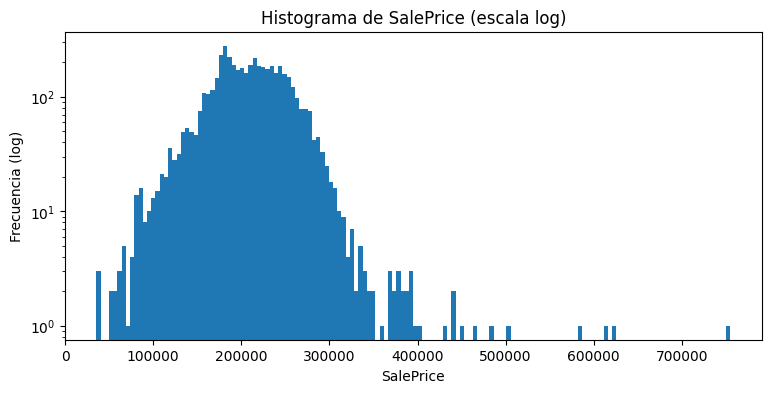

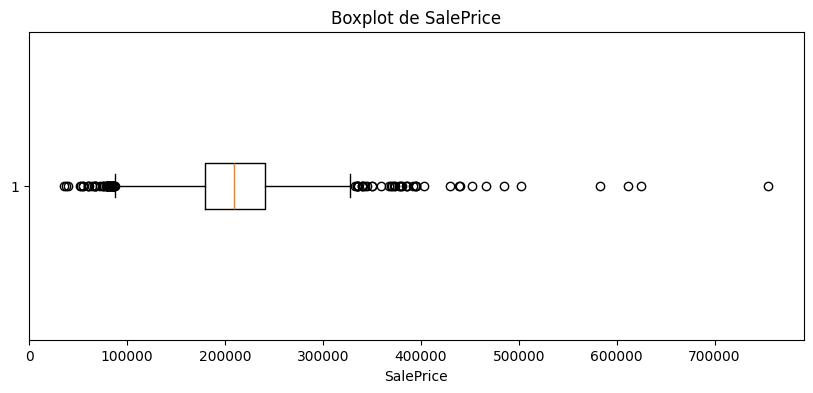

In [206]:
'''Tenemos que ver los valores de nuestra variable objetivo c_SalePrice'''
plt.figure(figsize=(9,4))
plt.hist(data['c_SalePrice'], bins=150)
plt.yscale('log') #usamos esta escala para que los outliers sean mas evidentes
plt.title('Histograma de SalePrice (escala log)')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia (log)')
plt.show() 

#Un boxplot para visualizarlo de otra manera
plt.figure(figsize=(10,4))
plt.boxplot(data['c_SalePrice'], vert=False)
plt.title('Boxplot de SalePrice')
plt.xlabel('SalePrice')
plt.show()

#Vemos que evidentemente hay muchos outliers

In [207]:
#Veamos cuantos outliers hay con el rango intercuantil
q1 = data['c_SalePrice'].quantile(0.25)
q3 = data['c_SalePrice'].quantile(0.75)
iqr = q3 - q1 

#calculamos los limites
lower = q1 - 1.5 * iqr 
upper = q3 + 1.5 * iqr

#tomammos los registros con los valores en SalePrice considerados como outliers
outliers = data[(data['c_SalePrice'] < lower) | (data['c_SalePrice'] > upper)]
print('Tenemos el siguiente numero de ouliers para la variable objetivo:',outliers.shape[0])

Tenemos el siguiente numero de ouliers para la variable objetivo: 89


In [208]:
'''Ahora, lo que podemos hacer para deshacernos de los outliers es capear los registros, esto es asignar le valor lower y upper a los outliers'''

data['c_SalePrice_cap'] = data['c_SalePrice'].clip(lower, upper) #Metodo para capear las datos
#Volvemos a checar los outliers para esta nueva variable
outliers2 = data[(data['c_SalePrice_cap'] < lower) | (data['c_SalePrice_cap'] > upper)]
print(outliers2['c_SalePrice_cap'])
data = data.drop(columns='c_SalePrice') #Eliminamos la variable objetivo no capeada
#No hay ninguno

Series([], Name: c_SalePrice_cap, dtype: float64)


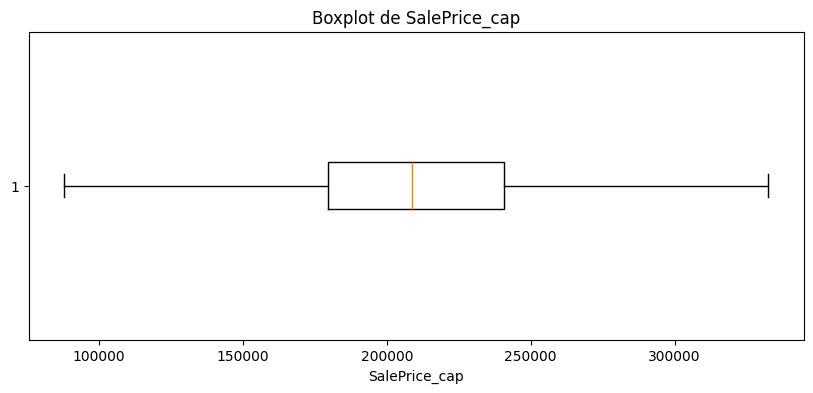

In [209]:
#Un boxplot para visualizarlo
plt.figure(figsize=(10,4))
plt.boxplot(data['c_SalePrice_cap'], vert=False)
plt.title('Boxplot de SalePrice_cap')
plt.xlabel('SalePrice_cap')
plt.show()

In [210]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 0 to 6209
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   d_Id             4922 non-null   int64  
 1   d_MSSubClass     4922 non-null   int64  
 2   s_MSZoning       4922 non-null   object 
 3   c_LotFrontage    4922 non-null   float64
 4   c_LotArea        4922 non-null   float64
 5   s_Street         4922 non-null   object 
 6   s_Alley          4922 non-null   object 
 7   s_LotShape       4922 non-null   object 
 8   s_LandContour    4922 non-null   object 
 9   s_LotConfig      4922 non-null   object 
 10  s_LandSlope      4922 non-null   object 
 11  s_Neighborhood   4922 non-null   object 
 12  s_Condition1     4922 non-null   object 
 13  s_Condition2     4922 non-null   object 
 14  s_BldgType       4922 non-null   object 
 15  s_HouseStyle     4922 non-null   object 
 16  d_OverallQual    4922 non-null   int64  
 17  c_OverallCond    49

4. Train model

Comencemos con los modelos de regresion: Linear Regression, Linear Polinomial, Support Vector
Regressor, DecisionTree Regressor, (Logistic Regressor)

Linear Regression

In [211]:
'''Comencemos con Linear Regression. Nuestra variable objetivo es c_SalePrcie_cap'''

from sklearn.linear_model import LinearRegression #Para el modelo de regrision
from sklearn.model_selection import train_test_split #Para dividir los datos en train y test


In [212]:
#Primero hagamos One Hot Encoding con las variables string que tengan 50 o menos categorias. Si tienen mas, no se usran
cat_cols = [col for col in data.columns if col.startswith('s_')] #Filtramos las variables string
cols_50 = [col for col in cat_cols if data[col].nunique() <= 50] #contamos cuantas categorias tiene cada una y seleccionamos solo las que tienen 50 o menos
print(cols_50)
print(len(cols_50))

#Hacemos el encoding
dummies = pd.get_dummies(data[cols_50], drop_first=True) #drop_first para evitar multicolinealidad
data = data.drop(columns=cat_cols) #eliminamos las columnas string
print('Tenemos el siguiente numero de columnas despues de eliminar las variables string con mas de 50 cat:' ,data.shape[1] + len(cols_50))
data = pd.concat([data, dummies], axis=1) #Agregamos los dummies
print(data.shape)
'''PD. Me tarde un buen en esto'''

['s_MSZoning', 's_Street', 's_Alley', 's_LotShape', 's_LandContour', 's_LotConfig', 's_LandSlope', 's_Neighborhood', 's_Condition1', 's_Condition2', 's_BldgType', 's_HouseStyle', 's_RoofStyle', 's_RoofMatl', 's_Exterior1st', 's_Exterior2nd', 's_ExterQual', 's_ExterCond', 's_Foundation', 's_BsmtQual', 's_BsmtCond', 's_BsmtExposure', 's_BsmtFinType1', 's_BsmtFinType2', 's_Heating', 's_HeatingQC', 's_CentralAir', 's_Electrical', 's_KitchenQual', 's_Functional', 's_FireplaceQu', 's_GarageType', 's_GarageFinish', 's_GarageQual', 's_GarageCond', 's_PavedDrive', 's_Fence', 's_SaleType', 's_SaleCondition']
39
Tenemos el siguiente numero de columnas despues de eliminar las variables string con mas de 50 cat: 79
(4922, 252)


'PD. Me tarde un buen en esto'

Esto ultimo (dummies) es parte del feature engineering, pero por como se fue dando el flujo de trabajo lo deje aqui

In [213]:
#Asigno las variables
x = data.drop('c_SalePrice_cap', axis=1)
y = data['c_SalePrice_cap']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [214]:
#Cargo el modelo y meto los datos
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [215]:
#Veamos como predice
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Hacemos las predicciones con los datos test
y_pred = modelo.predict(x_test)

#Hacemos las metricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('La R^2 es:', r2)
print('La raiz del error cuadratico medio:', rmse)
print('El error absoluto medio:', mae)

La R^2 es: 0.5403604693162238
La raiz del error cuadratico medio: 31021.830445525724
El error absoluto medio: 22299.930939527632


De acuerdo a R^2 vemos que las predicciones son decentes pues es 54% mejor que solo usar la media. Luego, algunas de las predicciones se alejan bastante del valor 
real de acuerdo al rmse (las predicciones se alejan mucho de los valores reales en algunos casos). Por otro lado, de acuerdo al mae, en promedio cualquier prediccion 
que haga el modelo sera +-23,000 unidades del precio correcto.

Linear Polinomial

In [216]:
'''Es bastante analogo al anterior, solo que ahora intentamos capturar relaciones no lineales mediante la transforamcion de las variables x a polinomios de grado mayor'''

#Asigno las variables
x = data.drop('c_SalePrice_cap', axis=1)
y = data['c_SalePrice_cap']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Hacmos polinomios de grado 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train) #La regresion ya toma en cuenta el bias

In [217]:
#Hacemos la regresion
modelo = LinearRegression()
modelo.fit(x_train_poly, y_train)

LinearRegression()

In [218]:
#Hacemos las predicciones con los datos test
x_test_poly = poly.transform(x_test) #El modelo fue entrenado con polinamios de grado 2, por tanto los datos test deben ser iguales
y_pred = modelo.predict(x_test_poly)

#Hacemos las metricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('La R^2 es:', r2)
print('La raiz del error cuadratico medio:', rmse)
print('El error absoluto medio:', mae)


La R^2 es: -3.9945200703302968
La raiz del error cuadratico medio: 102259.95914428565
El error absoluto medio: 34760.99175484158


Vemos como esto es un desastre. Esto se puede deber a que, al agregar dummies y hacer polinomios de grado 2 para todas las variables, la complejidad crece
de una manera absurda a tal grado de ser redundante (mucha colinealidad), generando mucho ruido lo cual explota en muy malas predicciones.

Support Vector Regressor

In [219]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler #Para este modelo necesitamos escalar los datos

#Asigno las variables
x = data.drop('c_SalePrice_cap', axis=1)
y = data['c_SalePrice_cap']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [220]:
#Escalamos las variables
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)

# Definimos el modelo
modelo = SVR(
    kernel='rbf',  #kernel no lineal por defecto
    C=1600.0,        #fuerza de regularización 
    epsilon=1    #ancho del tubo de tolerancia
)

#Etrenamos el modelo con los datos escalados
modelo.fit(x_train_s, y_train)

SVR(C=1600.0, epsilon=1)

Estuve jugando un rato con los parametros C y epsilon para mejorar la R2. Descubri que entre mas aumento el parametro C, mejora el entrenamiento, pero llega un punto en el
que esto deja de funcionar sin importar cuanto lo aumente.

In [221]:
#Para hacer las predicciones, tambien tenemos que normalizar los datos test
x_test_s = scaler.transform(x_test)

#Hacemos las predicciones
y_pred = modelo.predict(x_test_s)

In [222]:
#Calculamos las metricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('La R^2 es:', r2)
print('La raiz del error cuadratico medio:', rmse)
print('El error absoluto medio:', mae)

La R^2 es: 0.5031879148192369
La raiz del error cuadratico medio: 32251.86322799951
El error absoluto medio: 22709.452011118432


Vemos que todas las metricas no son tan buenas como en la regresion lineal. Sin embargo no estan tan mal como la regresion usando polinomios.

In [223]:
#Usando los datos de entrenamiento podemos ver si hay underfitting o overfitting

y_train_pred = modelo.predict(x_train_s)

r2_train = r2_score(y_train, y_train_pred)
print("R^2 train:", r2_train)
print("R^2 test:", r2)


R^2 train: 0.5237321059724498
R^2 test: 0.5031879148192369


Vemos que no hay un underfitting u overfittign claro, pero necesitariamos escalar la complejidad del modelo para que logre aprender mejor. El relativo buen resultado que se logro fue gracias a que aumente mucho el parametro C.

DecisionTree Regressor

In [224]:
from sklearn.tree import DecisionTreeRegressor

#Asigno las variables
x = data.drop('c_SalePrice_cap', axis=1)
y = data['c_SalePrice_cap']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [225]:
#Defino el modelo
modelo_tree = DecisionTreeRegressor(
    max_depth=6,          #asignamos un valor arbitrario para evitar el overfitting
    random_state=0
)

#Entrenamos el modelo
modelo_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

Estuve experimentando con los parametros para lograr el mejor resultado

In [226]:
# Hacemos las predicciones
y_pred = modelo_tree.predict(x_test)

#Las metricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('La R^2 es:', r2)
print('La raiz del error cuadratico medio:', rmse)
print('El error absoluto medio:', mae)

La R^2 es: 0.7596555002806407
La raiz del error cuadratico medio: 22432.404494199418
El error absoluto medio: 15996.18103228005


Aqui vemos que la R2 indica que el modelo arroja muy buenas predicciones. Las tres metricas son mejores que con el modelo de regrsion lineal, el rmse mejora en mas de 8mil 
unidades y el mae en mas de 7mil. Hasta ahora se ve que los parametros que escogimos funcionaron muy bien

In [227]:
#Usando los datos de entrenamiento podemos ver si hay underfitting o overfitting
y_train_pred = modelo_tree.predict(x_train)
print("R² train:", r2_score(y_train, y_train_pred))
print("R² test :", r2_score(y_test, y_pred))

R² train: 0.8234084503029282
R² test : 0.7596555002806407


Vemos que la R2 de train no es mucho mayor a la de test, lo cual significa que no hay overfitting ni underfitting. Esto permite concluir que, hasta ahora, el Desition Tree 
Regressor es el mejor modelo.

En conclusion, para los modelos de regresion, vemos que el Desision tree regressor es la mejor opcion para la prediccion de estos datos cuando consideramos a una variable objetivo continua, esto gracias a que presento una R2 de .75. Por otra lado, la segunda mejor opcion seria la regresion lineal con su 0.54 en R2. El SVR no quedó muy lejos de ese mismo performance con su 0.5 en R2. Sin embargo, vimos que para la regresion con polinomios, el modelo es inutil, ya que presenta un valor de R2 negativo y las otras dos metricas tambien se disparan.

DecisionTreeClasificator

Para este modelo se necesita hacer categorias con la variable objetivo c_SalePrice_cap. Para esto, usare una guncion que calcula cuantiles y la dividire en 3 clases 0=baja, 1=media, 2=alta

In [228]:
data['price_cat_3'] = pd.qcut(data['c_SalePrice_cap'], q=3, labels=[0, 1, 2])
#Dropeo la columna continua original
data = data.drop(columns='c_SalePrice_cap')

In [229]:
#Asigno las variables
x = data.drop('price_cat_3', axis=1)
y = data['price_cat_3']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y) #este ultimo parametro ayuda a mantener las proporciones de clases

In [230]:
#Construimos el modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report

modelo_tree = DecisionTreeClassifier(
    criterion='entropy',  
    max_depth=6,        #igual que en regresión para controlar complejidad
    random_state=0
)

#Entrenamos el modelo
modelo_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

No se notó ninguna diferencia entre entropy o gini. Igualemente se jugo con los parametros para ver como daba mejores resultados, intentando que estuvieran parecidos al 
regression tree

Accuracy: 0.7549085985104943
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       493
           1       0.63      0.72      0.67       492
           2       0.78      0.74      0.76       492

    accuracy                           0.75      1477
   macro avg       0.76      0.75      0.76      1477
weighted avg       0.76      0.75      0.76      1477



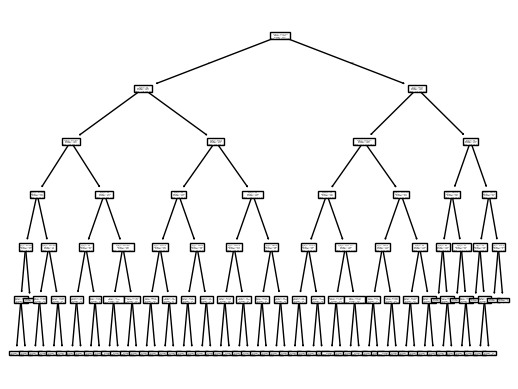

In [231]:
#Hacemos las predicciones
y_pred = modelo_tree.predict(x_test)

#Evaluamos con metricas y diagrama
print("Accuracy:", accuracy_score(y_test, y_pred))
tree.plot_tree(modelo_tree.fit(x_train, y_train))
print(classification_report(y_test,y_pred))

Vemos que en el modelo predice bien, pues tiene un accuracy de 75%, sin embargo no para todas las clases lo hace igual, pues vemos que las predicciones para la clase 1
(cases de precio medio) las predicciones fallan un poco mas a comparacion de las otras dos clases. Esto puede deberse a que sus precios y características se traslapan con las otras dos categorias, así que es normal que el modelo se confunda más ahí. Entonces podemos decir que el modelo funciona mejor en los extremos

KNN

In [232]:
#Asigno las variables
x = data.drop('price_cat_3', axis=1)
y = data['price_cat_3']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y)

#En este modelo es muy importante escalar las variables
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)


In [233]:
#Creamos el modelo 
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=5)

#Metemos los datos
modelo_knn.fit(x_train_s, y_train)

KNeighborsClassifier()

In [234]:
#Hacemos las predicciones con los datos de prueba
y_pred = modelo_knn.predict(x_test_s)

#Evaluamos el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6540284360189573
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       493
           1       0.53      0.57      0.55       492
           2       0.71      0.63      0.67       492

    accuracy                           0.65      1477
   macro avg       0.66      0.65      0.65      1477
weighted avg       0.66      0.65      0.65      1477



Podemos probar con diferentes numeros de vecinos

In [235]:
#Con 2
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(x_train_s, y_train)

#Hacemos las predicciones con los datos de prueba
y_pred = modelo_knn.predict(x_test_s)

#Evaluamos el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6540284360189573
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       493
           1       0.53      0.57      0.55       492
           2       0.71      0.63      0.67       492

    accuracy                           0.65      1477
   macro avg       0.66      0.65      0.65      1477
weighted avg       0.66      0.65      0.65      1477



In [236]:
#Con 10
modelo_knn = KNeighborsClassifier(n_neighbors=10)
modelo_knn.fit(x_train_s, y_train)

#Hacemos las predicciones con los datos de prueba
y_pred = modelo_knn.predict(x_test_s)

#Evaluamos el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6817874069058903
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       493
           1       0.57      0.64      0.60       492
           2       0.74      0.64      0.69       492

    accuracy                           0.68      1477
   macro avg       0.69      0.68      0.68      1477
weighted avg       0.69      0.68      0.68      1477



In [237]:
#Con 15
modelo_knn = KNeighborsClassifier(n_neighbors=20)
modelo_knn.fit(x_train_s, y_train)

#Hacemos las predicciones con los datos de prueba
y_pred = modelo_knn.predict(x_test_s)

#Evaluamos el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6790792146242384
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       493
           1       0.56      0.63      0.59       492
           2       0.74      0.68      0.71       492

    accuracy                           0.68      1477
   macro avg       0.69      0.68      0.68      1477
weighted avg       0.69      0.68      0.68      1477



Aqui vemos que el punto medio de hacer 10 vecinos es lo que me entrega un mejor accuracy de 68%. Las predicciones son bastante buenas pero se queda por detras del tree calssifier. En este modelo vemos el mismo compertamiento para las predicciones de las tres categorias: las predicciones de la categoria 1 no son tan buenas como las de las otras dos categorias y se puede atribuir a la misma razon. Por ultimo es posible que la ventaja que presenta el tree calssifier se debe a que este no depende del calculo de distancias y es mejor captando relaciones no lineales.

Red Neuronal ANN

In [238]:
#Asigno las variables
x = data.drop('price_cat_3', axis=1)
y = data['price_cat_3']
y = data['price_cat_3'].astype('int32') #convertimos a tipo entero en ligar de que sea tipo categorica

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y)

from sklearn.preprocessing import MinMaxScaler #Para escalar los datos

#Escalo los datos
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

Aqui usamos MinMaxScaler porque normaliza los datos en un rango de 0 a 1, lo cual es perfecto para este tipo de modelos

In [239]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


#Construimos la red
n_features = x_train_s.shape[1] #Numero de varables de entrada, neuronas de las primeras capas
n_classes = y.nunique() #clases objetivo, recordemos que son 3: 0=baja, 1=media, 2=alta

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=15, restore_best_weights=True) #Para evitar el overfitting

#Creamos el modelo y sus capas
model = keras.Sequential()
model.add(layers.Dense(20, activation='relu', input_dim = n_features)) #El numero de entradas es el numero de variables
model.add(layers.Dense(n_classes, activation='softmax'))  #Usamos softamax porque es clasificacion


model.compile(optimizer = keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #Optimizador Adam y funcion de perdida para clasificacion

C:\Users\Antonio Rojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Escogemos como 20 la dimension de la capa oculta tal y como se hizo en clase para el modelo de regresion

In [240]:
#Entrenamos el modelo
history = model.fit(x_train_s, y_train, batch_size=75, epochs=300, validation_data = (x_test_s, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5155 - loss: 0.9558 - val_accuracy: 0.5518 - val_loss: 0.8990
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5707 - loss: 0.8591 - val_accuracy: 0.5552 - val_loss: 0.8738
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5782 - loss: 0.8354 - val_accuracy: 0.5619 - val_loss: 0.8517
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5907 - loss: 0.8119 - val_accuracy: 0.5653 - val_loss: 0.8379
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6139 - loss: 0.7969 - val_accuracy: 0.6879 - val_loss: 0.8272
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - loss: 0.7795 - val_accuracy: 0.5897 - val_loss: 0.8208
Epoch 7/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6247 - loss: 0.7660 - val_accuracy: 0.6148 - val_loss: 0.8155
Epoch 8/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - loss: 0.7513 - val_accuracy: 0.6669 - v

Vemos como el accuracy es muy buena para los datos de entrenamiento, pero el accuracy de los datos test baja a 0.71, lo cual situa a este modelo por detras del tree calssifier, pero es mejor que el KNN. Gracias al early stop se datiene en la epoca 63 para evitar el overfitting. Tal vez si se añaden mas dimensiones y capas profundas a la red, sea capaz de mejorar el resultado

Random Forest Classifier

In [241]:
from sklearn.ensemble import RandomForestClassifier

#Cargamos los datos
x = data.drop('price_cat_3', axis=1)
y = data['price_cat_3']
y = data['price_cat_3'].astype('int32') #convertimos a tipo entero en ligar de que sea tipo categorica

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y)


In [242]:
# Definir Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

Trate de usar parametros parecidos a los que usamos en clase, aunque tambien experimente con otros valores para intentar mejorar el accuracy. Al final, aumentar los estimators o usar otros parametros que el RandomForestClassifier permite no mejoró los resultados.

In [243]:
# Entrenar
rf_clf.fit(x_train, y_train)

# Predecir
y_pred = rf_clf.predict(x_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7420446851726472
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       493
           1       0.62      0.68      0.65       492
           2       0.77      0.74      0.75       492

    accuracy                           0.74      1477
   macro avg       0.75      0.74      0.74      1477
weighted avg       0.75      0.74      0.74      1477



Por ultimo, podemos ver como el accuracy es bastante parecido al de el tree calssifier, aunque ligeramente mas bajo. De igual forma, se repite el patron que vimos con los demas modelos de clasificacion: la clase 1 cuesta mas trabajo predecirla por encontrarse en medio.

Podemos concluir que para los modelos de clasificacion, el tree calssifier es la mejor opcion (0.75), aunque no por mucho en contraste con el random forest (0.74). La tercera mejor opcion seria la ANN (0.71), e incluso mejorando su complejidad puede que iguale o mejore el desempeño de los dos mejores modelos. Aunque el KNN fue el que peor accuracy tuvo, su valor de 0.68 sigue siendo muy bueno.